In [128]:
import pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import random as rnd

In [129]:
df=pd.read_csv('andSVM.csv')
df

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,2,3,1
5,3,2,1
6,0,-1,0


In [130]:
X=np.asarray(df.iloc[:,0:2]) 
y=np.asarray(df.iloc[:,2])

In [131]:
def agunos(x):
    unos=np.array([np.ones(len(x))]) 
    x=np.array(np.concatenate((unos.T,x),axis=1)) 
    return x

In [132]:
def clasif(y): 
    pred=np.array([])
    for i in range(len(y)):
        if y[i]>=0:
            pr=1
        else:
            pr=0
        pred=np.append(pred,pr)  
    return pred

In [177]:
def train(X,y,eta):
    w=np.ones(X.shape[1])#np.random.uniform(0,1,size=X.shape[1])
    output=clasif(np.dot(X,w.T)) 
    err=y-output
    dif=sum(err)
    while(abs(dif)!=0):
        for i in range(X.shape[1]):
            w[i]=w[i]+eta*np.dot(y-clasif(np.dot(X,w.T)),X[:,i]) 
        output=clasif(np.dot(X,w.T)) 
        err=y-output 
        dif=sum(err)
    return w   

In [178]:
W=train(agunos(X),y,0.1) #entrena(X,y,0.1)
W

array([-0.6,  0.5,  0.5])

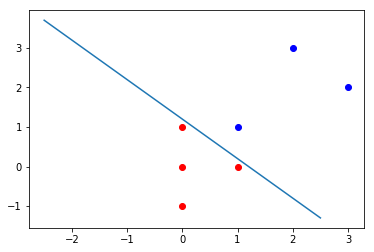

In [179]:
plt.scatter(df[df['y']==1]['X1'],df[df['y']==1]['X2'],color='blue') 
plt.scatter(df[df['y']==0]['X1'],df[df['y']==0]['X2'],color='red')
x=np.linspace(-2.5,2.5,10)
plt.plot(x,-(W[0]/W[2])-(W[1]/W[2])*x)

**iter**

In [180]:
def salida(w0,w,X):
    suma = w0
    for i in range(len(w)):
        suma = suma + w[i]*X[i]
    return suma

In [181]:
def escalon(x):
    if x>=0:
        a=1
    else:
        a=0
    return a    

In [301]:
def regularizado(w,x,y,eta):
    res=np.array([])

    for i in range(len(x)):

        sal = salida(w[0],w[1:len(w)],x[i])
        #Calculo el error de prediccion        
        error =y[i] - escalon(sal)
        # Obtengo el error w0
        w[0] = w[0] + eta*error
        
    
        for j in range(len(x.T)):
            w[j+1] = w[j+1] + eta*error*x[i,j]
        #print(escalon(sal),y[i])
        res=np.append(res,escalon(sal))
    return w,res

In [302]:
w0=np.ones(X.shape[1]+1)#[rnd.random() for i in range(X.shape[1]+1)]
ww,res=regularizado(w0,X,y,.1)
dif=np.sum(y!=res)
cont=0
while(dif!=0):
    ww,res=regularizado(ww,X,y,.1)
    dif=np.sum(y!=res)
    cont+=1
cont
ww

array([-0.6,  0.4,  0.4])

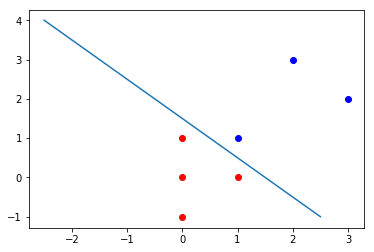

In [299]:
plt.scatter(df[df['y']==1]['X1'],df[df['y']==1]['X2'],color='blue') 
plt.scatter(df[df['y']==0]['X1'],df[df['y']==0]['X2'],color='red')
x=np.linspace(-2.5,2.5,10)
plt.plot(x,-(ww[0]/ww[2])-(ww[1]/ww[2])*x)

In [107]:
salida(w0[0],w0[1:2],a)

1.0

In [58]:
X[0]

array([0, 0])

In [60]:
X[0,:]

array([0, 0])

In [66]:
len(X.T)

2

In [90]:
w0=np.ones(X.shape[1]+1)#[rnd.random() for i in range(X.shape[1]+1)]

In [91]:
w0[0]+w0[1]*X[0,0]+w0[2]*X[0,1]

1.0

In [98]:
a=X[0]
a

array([0, 0])

In [106]:
salida(w0[0],w0[1:2],X[4])

3.0